In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
ls ~/somerville-ral-dummy-test/


data-dummy_data-lsst-backup.csv  data-dummy_data-lsst-backup_WITH_ZIPS.csv


In [41]:
df = pd.read_csv('~/somerville-ral-dummy-test/data-dummy_data-lsst-backup.csv').drop(columns=['LOCAL_FOLDER', 'BUCKET_NAME', 'DESTINATION_KEY', 'CHECKSUM'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_2.zip,141314,data/dummy_data/dummy_data/60/282/manifest.txt...,615.0,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534
1,collated_14.zip,141313,data/dummy_data/dummy_data/54/72/manifest.txt|...,615.0,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632
2,collated_0.zip,141343,data/dummy_data/dummy_data/33/224/manifest.txt...,615.0,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534
3,collated_6.zip,141315,data/dummy_data/dummy_data/15/90/manifest.txt|...,615.0,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576
4,collated_10.zip,141328,data/dummy_data/dummy_data/51/309/manifest.txt...,615.0,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688
...,...,...,...,...,...,...,...
58,/data/dummy_data/33/262/262.f,288358400,NaN,NaN,4.342785,2025-09-24 10:01:51.818982,2025-09-24 10:01:56.161767
59,/data/dummy_data/33/156/156.f,127926272,NaN,NaN,2.711084,2025-09-24 10:01:54.347005,2025-09-24 10:01:57.058089
60,/data/dummy_data/33/450/450.f,188743680,NaN,NaN,3.365911,2025-09-24 10:01:53.769618,2025-09-24 10:01:57.135529
61,/data/dummy_data/33/22/22.f,228589568,NaN,NaN,4.365923,2025-09-24 10:01:54.984878,2025-09-24 10:01:59.350801


In [42]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].fillna(0).astype(int)
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_2.zip,141314,data/dummy_data/dummy_data/60/282/manifest.txt...,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534
1,collated_14.zip,141313,data/dummy_data/dummy_data/54/72/manifest.txt|...,615,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632
2,collated_0.zip,141343,data/dummy_data/dummy_data/33/224/manifest.txt...,615,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534
3,collated_6.zip,141315,data/dummy_data/dummy_data/15/90/manifest.txt|...,615,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576
4,collated_10.zip,141328,data/dummy_data/dummy_data/51/309/manifest.txt...,615,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688
...,...,...,...,...,...,...,...
58,/data/dummy_data/33/262/262.f,288358400,NaN,0,4.342785,2025-09-24 10:01:51.818982,2025-09-24 10:01:56.161767
59,/data/dummy_data/33/156/156.f,127926272,NaN,0,2.711084,2025-09-24 10:01:54.347005,2025-09-24 10:01:57.058089
60,/data/dummy_data/33/450/450.f,188743680,NaN,0,3.365911,2025-09-24 10:01:53.769618,2025-09-24 10:01:57.135529
61,/data/dummy_data/33/22/22.f,228589568,NaN,0,4.365923,2025-09-24 10:01:54.984878,2025-09-24 10:01:59.350801


In [43]:
df['FILES_PER_ZIP'] = df['FILES_PER_ZIP'].astype('Int64')
df['UPLOAD_END'] = pd.to_datetime(df['UPLOAD_END'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['UPLOAD_START'] = pd.to_datetime(df['UPLOAD_START'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df['FILE_SIZE'] = df['FILE_SIZE'].astype('Int64')
df = df.dropna(subset=['UPLOAD_END', 'UPLOAD_START', 'FILE_SIZE'])
df

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END
0,collated_2.zip,141314,data/dummy_data/dummy_data/60/282/manifest.txt...,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534
1,collated_14.zip,141313,data/dummy_data/dummy_data/54/72/manifest.txt|...,615,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632
2,collated_0.zip,141343,data/dummy_data/dummy_data/33/224/manifest.txt...,615,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534
3,collated_6.zip,141315,data/dummy_data/dummy_data/15/90/manifest.txt|...,615,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576
4,collated_10.zip,141328,data/dummy_data/dummy_data/51/309/manifest.txt...,615,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688
...,...,...,...,...,...,...,...
58,/data/dummy_data/33/262/262.f,288358400,NaN,0,4.342785,2025-09-24 10:01:51.818982,2025-09-24 10:01:56.161767
59,/data/dummy_data/33/156/156.f,127926272,NaN,0,2.711084,2025-09-24 10:01:54.347005,2025-09-24 10:01:57.058089
60,/data/dummy_data/33/450/450.f,188743680,NaN,0,3.365911,2025-09-24 10:01:53.769618,2025-09-24 10:01:57.135529
61,/data/dummy_data/33/22/22.f,228589568,NaN,0,4.365923,2025-09-24 10:01:54.984878,2025-09-24 10:01:59.350801


In [44]:
df['OVERLAP'] = df['UPLOAD_END'].shift(1) > df['UPLOAD_START']
df[df['OVERLAP'] == False]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
0,collated_2.zip,141314,data/dummy_data/dummy_data/60/282/manifest.txt...,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534,False
24,/data/dummy_data/33/379/379.f,1048576,NaN,0,0.015887,2025-09-24 10:01:49.111185,2025-09-24 10:01:49.127072,False
57,/data/dummy_data/33/138/138.f,7340032,NaN,0,0.088395,2025-09-24 10:01:55.779305,2025-09-24 10:01:55.867700,False


In [45]:
df[df['OVERLAP'] == True]

,LOCAL_PATH,FILE_SIZE,ZIP_CONTENTS,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP
1,collated_14.zip,141313,data/dummy_data/dummy_data/54/72/manifest.txt|...,615,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632,True
2,collated_0.zip,141343,data/dummy_data/dummy_data/33/224/manifest.txt...,615,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534,True
3,collated_6.zip,141315,data/dummy_data/dummy_data/15/90/manifest.txt|...,615,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576,True
4,collated_10.zip,141328,data/dummy_data/dummy_data/51/309/manifest.txt...,615,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688,True
5,collated_11.zip,141363,data/dummy_data/dummy_data/39/8/manifest.txt|d...,615,2.482986,2025-09-24 10:01:43.212371,2025-09-24 10:01:45.695357,True
6,collated_9.zip,139900,data/dummy_data/dummy_data/6/119/manifest.txt|...,615,2.384973,2025-09-24 10:01:43.381017,2025-09-24 10:01:45.765990,True
7,collated_1.zip,141233,data/dummy_data/dummy_data/30/308/manifest.txt...,615,2.878328,2025-09-24 10:01:43.062428,2025-09-24 10:01:45.940756,True
8,collated_12.zip,141372,data/dummy_data/dummy_data/55/408/manifest.txt...,615,2.823976,2025-09-24 10:01:43.273303,2025-09-24 10:01:46.097279,True
9,collated_5.zip,141304,data/dummy_data/dummy_data/18/79/manifest.txt|...,615,2.672506,2025-09-24 10:01:43.552553,2025-09-24 10:01:46.225059,True
10,collated_4.zip,141368,data/dummy_data/dummy_data/22/69/manifest.txt|...,615,3.123794,2025-09-24 10:01:43.200471,2025-09-24 10:01:46.324265,True


In [46]:
df = df.drop(columns=['ZIP_CONTENTS'])

In [47]:
print(f'Instances of overlap: {df["OVERLAP"].sum()} vs instanses of no overlap: {(~df["OVERLAP"]).sum()}')

Instances of overlap: 60 vs instanses of no overlap: 3


In [48]:
df['TYPE'] = df['LOCAL_PATH'].apply(lambda x: 'zip' if x.endswith('.zip') else 'file')
df.drop(columns=['LOCAL_PATH'], inplace=True)
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,141314,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534,False,zip
1,141313,615,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632,True,zip
2,141343,615,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534,True,zip
3,141315,615,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576,True,zip
4,141328,615,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688,True,zip
...,...,...,...,...,...,...,...
58,288358400,0,4.342785,2025-09-24 10:01:51.818982,2025-09-24 10:01:56.161767,True,file
59,127926272,0,2.711084,2025-09-24 10:01:54.347005,2025-09-24 10:01:57.058089,True,file
60,188743680,0,3.365911,2025-09-24 10:01:53.769618,2025-09-24 10:01:57.135529,True,file
61,228589568,0,4.365923,2025-09-24 10:01:54.984878,2025-09-24 10:01:59.350801,True,file


In [49]:
df

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE
0,141314,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534,False,zip
1,141313,615,0.711814,2025-09-24 10:01:43.345818,2025-09-24 10:01:44.057632,True,zip
2,141343,615,1.709642,2025-09-24 10:01:43.224892,2025-09-24 10:01:44.934534,True,zip
3,141315,615,1.453633,2025-09-24 10:01:43.492943,2025-09-24 10:01:44.946576,True,zip
4,141328,615,2.293118,2025-09-24 10:01:43.290570,2025-09-24 10:01:45.583688,True,zip
...,...,...,...,...,...,...,...
58,288358400,0,4.342785,2025-09-24 10:01:51.818982,2025-09-24 10:01:56.161767,True,file
59,127926272,0,2.711084,2025-09-24 10:01:54.347005,2025-09-24 10:01:57.058089,True,file
60,188743680,0,3.365911,2025-09-24 10:01:53.769618,2025-09-24 10:01:57.135529,True,file
61,228589568,0,4.365923,2025-09-24 10:01:54.984878,2025-09-24 10:01:59.350801,True,file


In [50]:
len(df[df['TYPE'] == 'zip']), len(df[df['TYPE'] == 'file'])

(31, 32)

In [51]:
zip_upload_time = df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum()
zip_upload_time

76.706284

In [52]:
print(f"Total upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for zip files: {df[df['TYPE'] == 'zip']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Avergage number of files per zip: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].mean():.2f}")
print(f"Total files in zips: {df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.0f}")
print(f"Average upload time per file in zips: {zip_upload_time / df[df['TYPE'] == 'zip']['FILES_PER_ZIP'].sum():.2f} seconds")
print(f"Total upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time for file uploads: {df[df['TYPE'] == 'file']['UPLOAD_TIME'].mean():.2f} seconds")
print(f"Total upload time: {df['UPLOAD_TIME'].sum():.0f} seconds")
print(f"Average upload time: {df['UPLOAD_TIME'].mean():.2f} seconds")

Total upload time for zip files: 77 seconds
Average upload time for zip files: 2.47 seconds
Avergage number of files per zip: 615.00
Total files in zips: 19065
Average upload time per file in zips: 0.00 seconds
Total upload time for file uploads: 69 seconds
Average upload time for file uploads: 2.15 seconds
Total upload time: 146 seconds
Average upload time: 2.31 seconds


In [53]:
zip_total_size = df[df['TYPE'] == 'zip']['FILE_SIZE'].sum()
zip_total_size / (1024 * 1024 * 1024)

0.004069038666784763

In [54]:
file_total_size = df[df['TYPE'] == 'file']['FILE_SIZE'].sum()
file_total_size / (1024 * 1024 * 1024)

3.6591796875

In [55]:
print(f"Zip file size stats (MB):")
print(df[df['TYPE'] == 'zip']['FILE_SIZE'].describe() / (1024 * 1024))

Zip file size stats (MB):
count     0.00003
mean      0.13441
std      0.000555
min      0.133318
25%      0.133973
50%      0.134767
75%      0.134809
max      0.134832
Name: FILE_SIZE, dtype: Float64


In [56]:
print(f"File size stats (MB):")
print(df[df['TYPE'] == 'file']['FILE_SIZE'].describe() / (1024 * 1024))

File size stats (MB):
count     0.000031
mean     117.09375
std      79.490458
min            1.0
25%           59.5
50%          105.0
75%          173.0
max          290.0
Name: FILE_SIZE, dtype: Float64


In [57]:
df['TRANSFER_RATE'] = df['FILE_SIZE'] / df['UPLOAD_TIME'] * 8 / (1024**3)
print(f"Transfer rate stats (Gb/s):")
df['TRANSFER_RATE'].describe()

Transfer rate stats (Gb/s):


count        63.0
mean      0.22795
std      0.237118
min      0.000134
25%      0.000467
50%      0.203434
75%      0.440376
max      0.672539
Name: TRANSFER_RATE, dtype: Float64

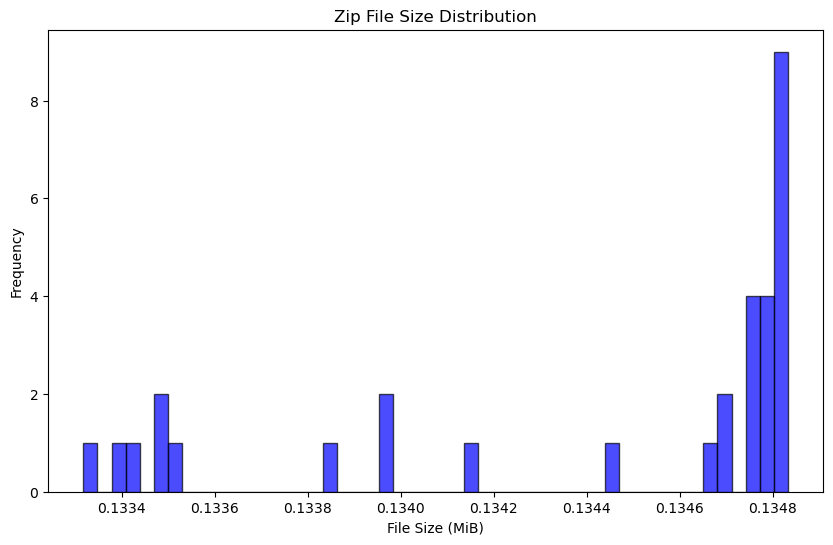

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

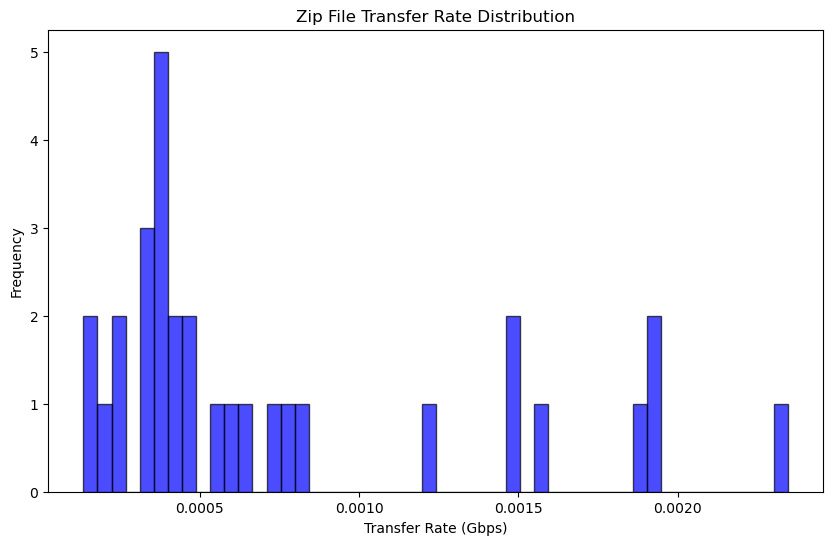

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Zip File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

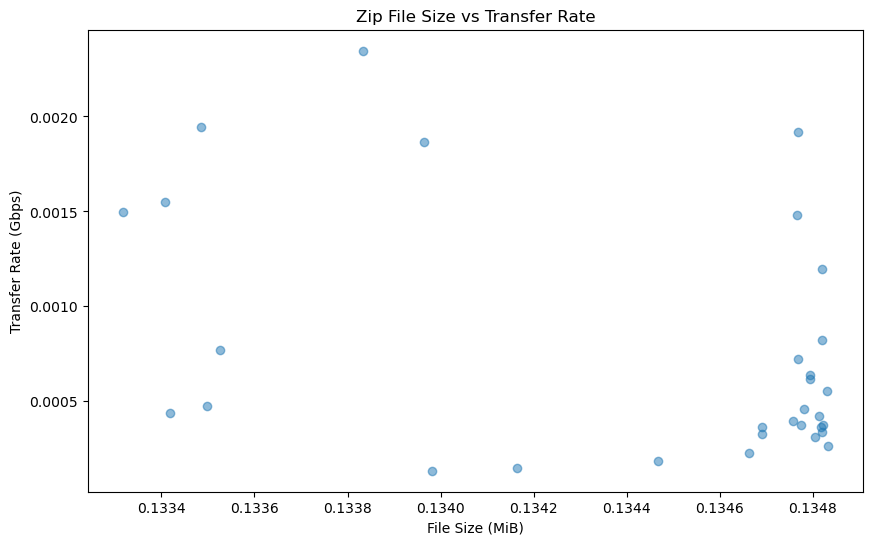

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'zip']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'zip']['TRANSFER_RATE'], alpha=0.5)
plt.title('Zip File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

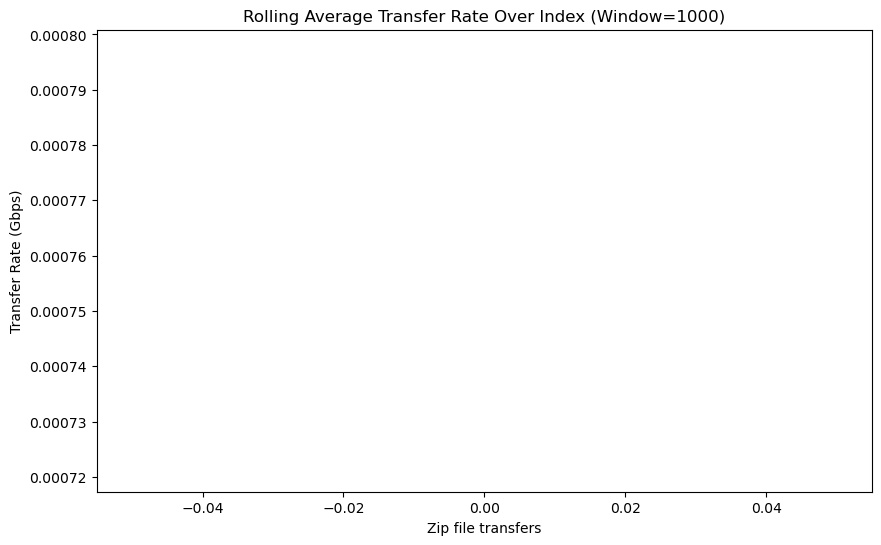

In [61]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'zip']['TRANSFER_RATE'].mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=1000)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Zip file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

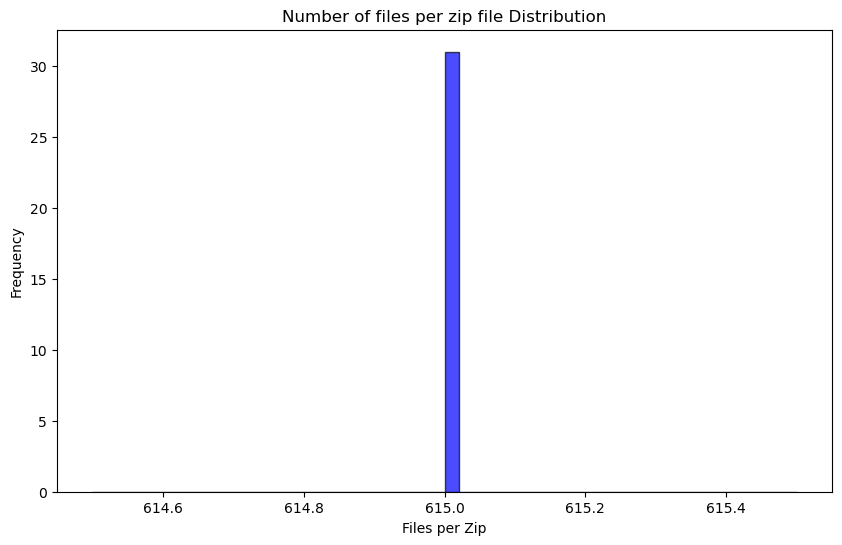

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'zip']['FILES_PER_ZIP'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Number of files per zip file Distribution')
plt.xlabel('Files per Zip')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

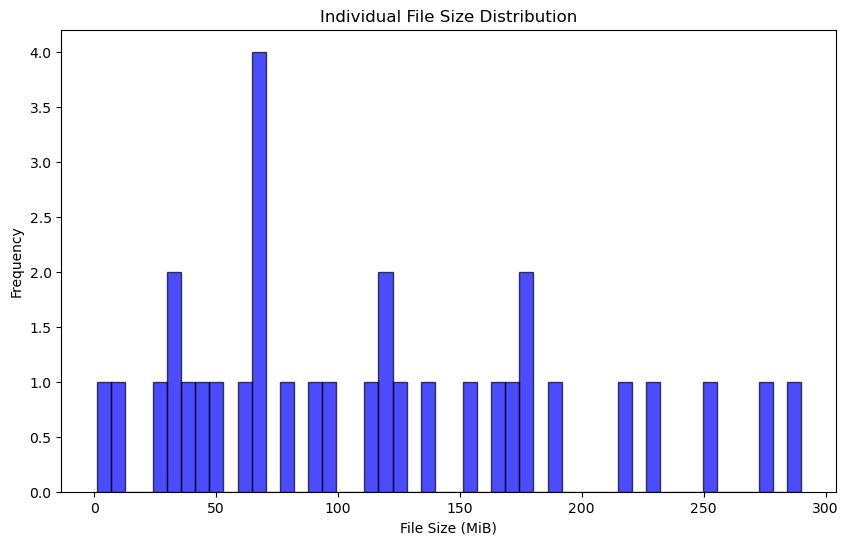

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

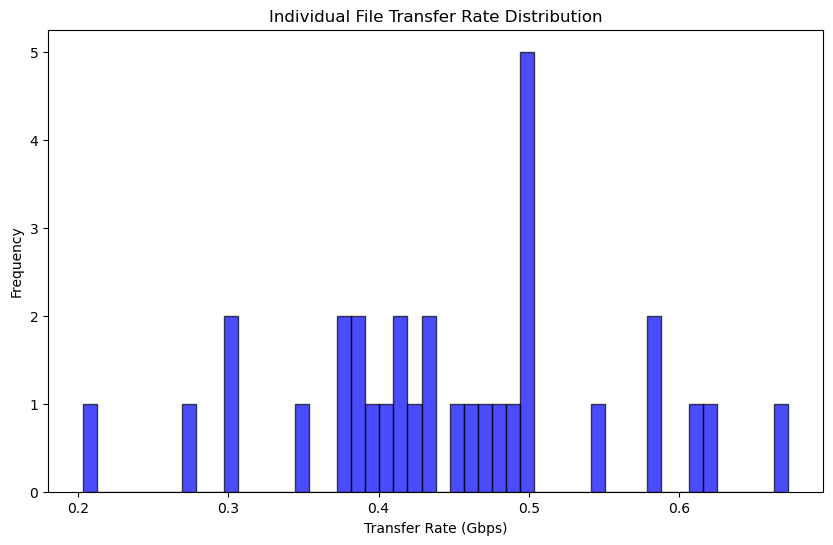

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['TYPE'] == 'file']['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Individual File Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

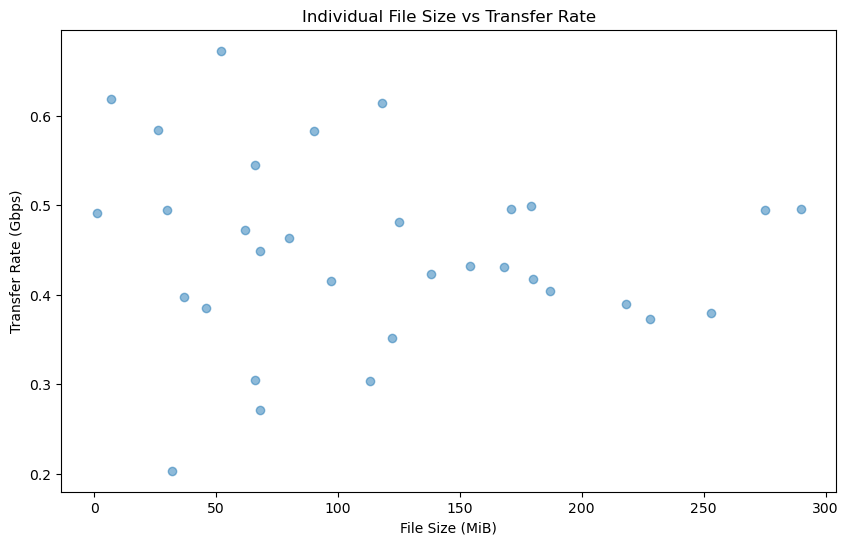

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['TYPE'] == 'file']['FILE_SIZE'] / 1024**2, df[df['TYPE'] == 'file']['TRANSFER_RATE'], alpha=0.5)
plt.title('Individual File Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

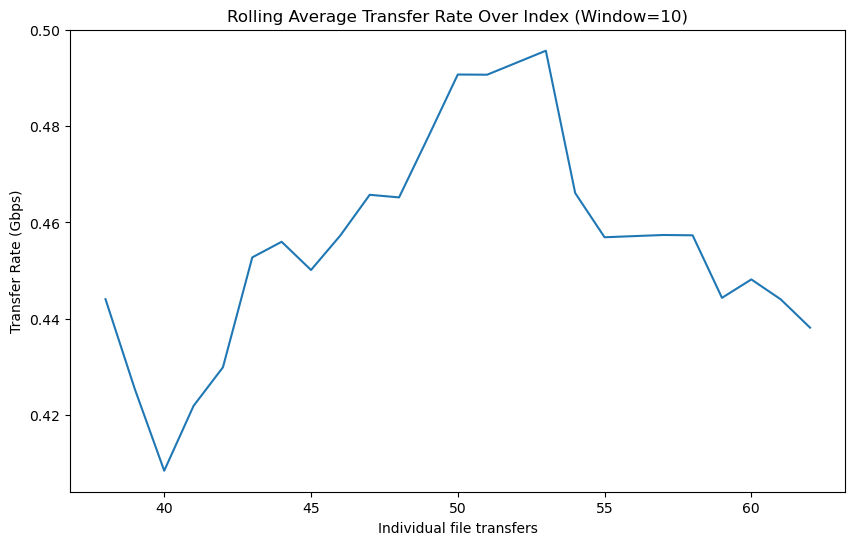

In [66]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df[df['TYPE'] == 'file']['TRANSFER_RATE'].rolling(window=10).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=10)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('Individual file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

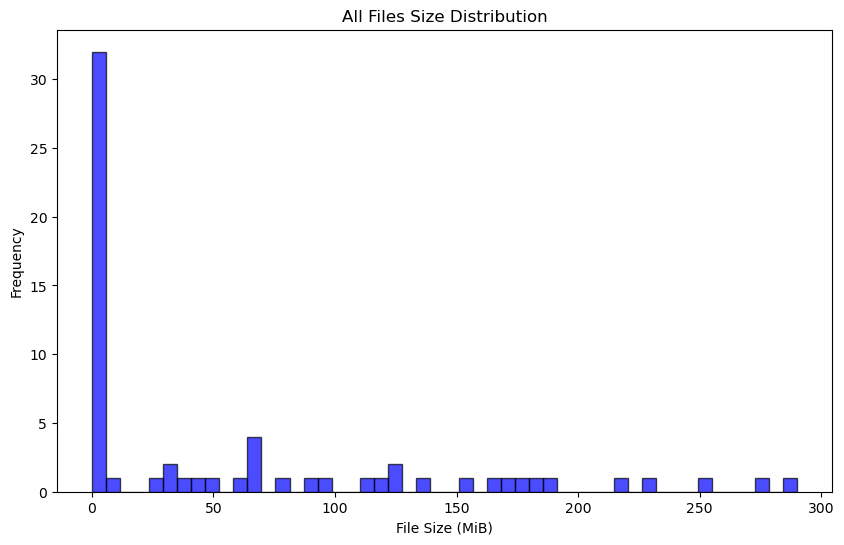

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['FILE_SIZE']/1024**2, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Size Distribution')
plt.xlabel('File Size (MiB)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

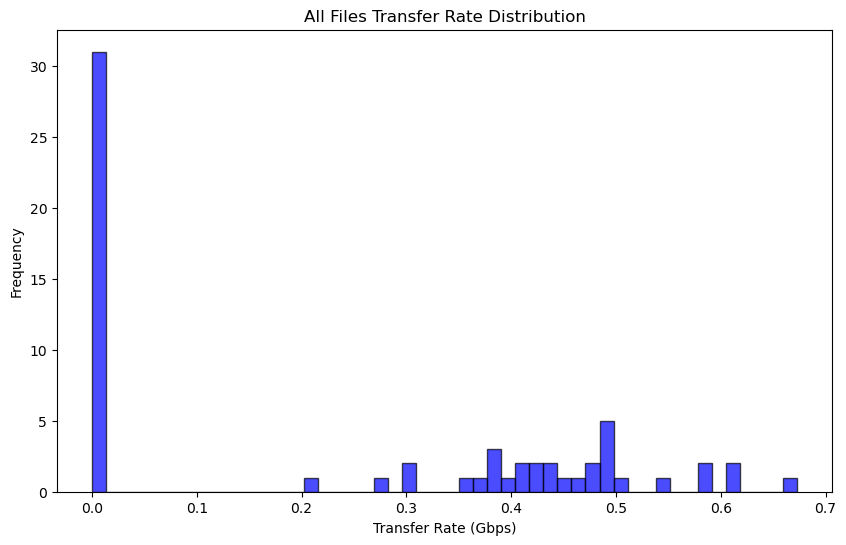

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['TRANSFER_RATE'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('All Files Transfer Rate Distribution')
plt.xlabel('Transfer Rate (Gbps)')
plt.ylabel('Frequency')
# plt.xlim(0, 10)
# plt.ylim(0, 200)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

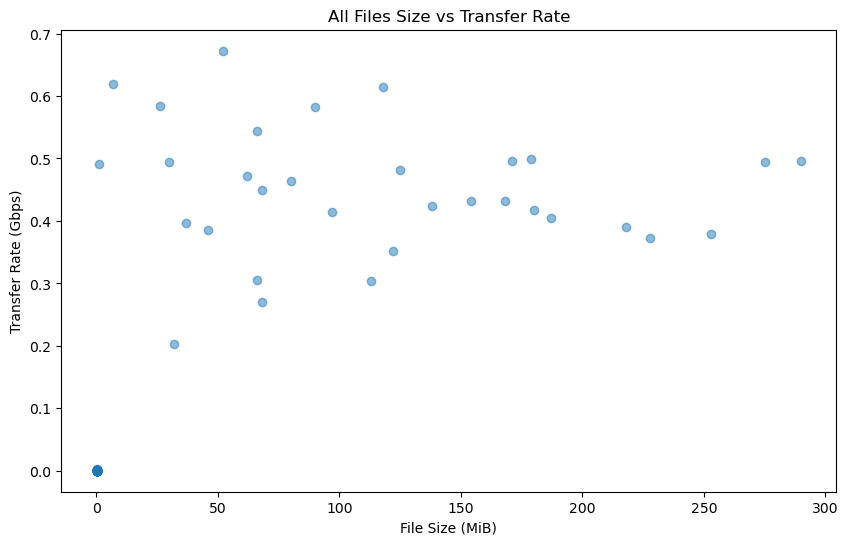

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FILE_SIZE'] / 1024**2, df['TRANSFER_RATE'], alpha=0.5)
plt.title('All Files Size vs Transfer Rate')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('File Size (MiB)')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

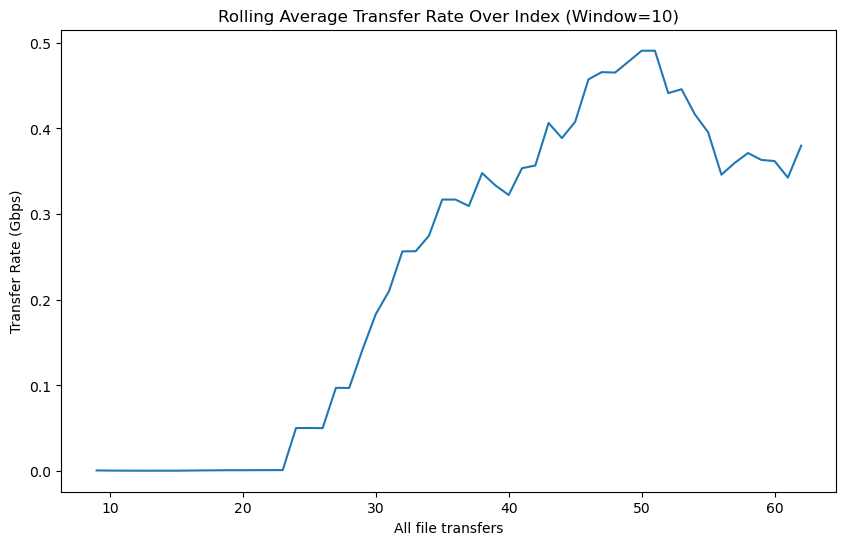

In [70]:
# Calculate the rolling average of the transfer rate over a window of 100
rolling_avg = df['TRANSFER_RATE'].rolling(window=10).mean()

# Plotting the rolling average transfer rate over the index
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg)
plt.title('Rolling Average Transfer Rate Over Index (Window=10)')
# plt.xlim(0,3000)
# plt.ylim(0, 15)
plt.xlabel('All file transfers')
plt.ylabel('Transfer Rate (Gbps)')
plt.show()

In [71]:
df[~df['OVERLAP']]

,FILE_SIZE,FILES_PER_ZIP,UPLOAD_TIME,UPLOAD_START,UPLOAD_END,OVERLAP,TYPE,TRANSFER_RATE
0,141314,615,0.548586,2025-09-24 10:01:43.125948,2025-09-24 10:01:43.674534,False,zip,0.001919
24,1048576,0,0.015887,2025-09-24 10:01:49.111185,2025-09-24 10:01:49.127072,False,file,0.491754
57,7340032,0,0.088395,2025-09-24 10:01:55.779305,2025-09-24 10:01:55.867700,False,file,0.618672


In [72]:
import numpy as np
from dask import dataframe as dd
from distributed import Client
client = Client()
print(client.dashboard_link)
df = df.sort_values(by='UPLOAD_START').reset_index(drop=True)
client.scatter(df)
print("sorted df")
print("from pandas df to dask ddf")
ddf = dd.from_pandas(df, npartitions=100)
# --- 1. Data Preparation ---
# Ensure datetime types for accurate calculations
# ddf['UPLOAD_START'] = dd.to_datetime(ddf['UPLOAD_START'])
# ddf['UPLOAD_END'] = dd.to_datetime(ddf['UPLOAD_END'])

# Sort by upload start time to process events chronologically
# --- 2. Create an Event Timeline ---
# Create a list of "events": the start and end of each transfer.
# At each start, the total network rate increases. At each end, it decreases.
def gen_events(row):
    events = []
    if pd.notna(row['TRANSFER_RATE']) and row['TRANSFER_RATE'] > 0:
        events.append({'time': row['UPLOAD_START'], 'rate_change': row['TRANSFER_RATE']})
        events.append({'time': row['UPLOAD_END'], 'rate_change': -row['TRANSFER_RATE']})
    # return pd.DataFrame(events).sort_values(by='time').reset_index(drop=True)
    return events

def process_partition(partition):
    # Apply the function to each row to get a list of lists of dictionaries
    list_of_events = partition.apply(gen_events, axis=1).sum()
    # If no events were generated in this partition, return an empty DataFrame
    if not list_of_events:
        return pd.DataFrame({'time': pd.Series(dtype='datetime64[ns]'), 'rate_change': pd.Series(dtype='float64')})
    # Convert the list of events into a single DataFrame for the partition
    return pd.DataFrame(list_of_events)

events_ddf = ddf.map_partitions(
    process_partition,
    meta={'time': 'datetime64[ns]', 'rate_change': 'float64'}
).dropna().reset_index(drop=True)
print("set up events_ddf")
# Convert the list of events to a DataFrame and sort chronologically
events_df = events_ddf.compute().sort_values(by='time').reset_index(drop=True)
events_df['time'] = pd.to_datetime(events_df['time'])
print("computed events_df")
# --- 3. Calculate Throughput Over Time ---
# Iterate through the timeline, calculating the total data transferred during each interval
# between events. During each interval, the total transfer rate is constant.
total_data_transferred_gb = 0
current_rate_gbps = 0
print("starting loop over events_df")
for i in range(len(events_df) - 1):
    # Update the current total rate with the change from the current event
    current_rate_gbps += events_df.loc[i, 'rate_change']
    
    # Calculate the duration of the current interval (until the next event)
    start_interval = events_df.loc[i, 'time']
    end_interval = events_df.loc[i + 1, 'time']
    duration_seconds = (end_interval - start_interval).total_seconds()
    
    # If there is time between events, calculate data transferred and add to total
    if duration_seconds > 0:
        # Data = Rate (Gbps) * Time (s) -> gives Gigabits
        data_in_interval_gb = current_rate_gbps * duration_seconds
        total_data_transferred_gb += data_in_interval_gb

# --- 4. Calculate Final Results ---
# Total time from the first upload start to the last upload end
total_duration_seconds = (events_df['time'].max() - events_df['time'].min()).total_seconds()

# The overall average network speed is the total data transferred divided by the total time
if total_duration_seconds > 0:
    estimated_total_speed_gbps = total_data_transferred_gb / total_duration_seconds
else:
    estimated_total_speed_gbps = 0

print(f"Total duration of all transfers: {total_duration_seconds:.2f} seconds")
print(f"Total data transferred (accounting for overlaps): {total_data_transferred_gb / 8:.2f} GiB")
print(f"Estimated average total network speed: {estimated_total_speed_gbps:.2f} Gbps")

/home/dave/miniconda3/envs/lsst-uk/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36621 instead
  warnings.warn(


http://127.0.0.1:36621/status
sorted df
from pandas df to dask ddf
set up events_ddf
computed events_df
starting loop over events_df
Total duration of all transfers: 16.43 seconds
Total data transferred (accounting for overlaps): 3.66 GiB
Estimated average total network speed: 1.78 Gbps


In [73]:
# Verify average
print(f"{(df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds():.2f} s, {df['FILE_SIZE'].sum() / (1024**3):.2f} GiB, {df['FILE_SIZE'].sum() * 8 / (1024**3) / ((df['UPLOAD_END'].max() - df['UPLOAD_START'].min()).total_seconds()):.2f} Gbps")

16.43 s, 3.66 GiB, 1.78 Gbps


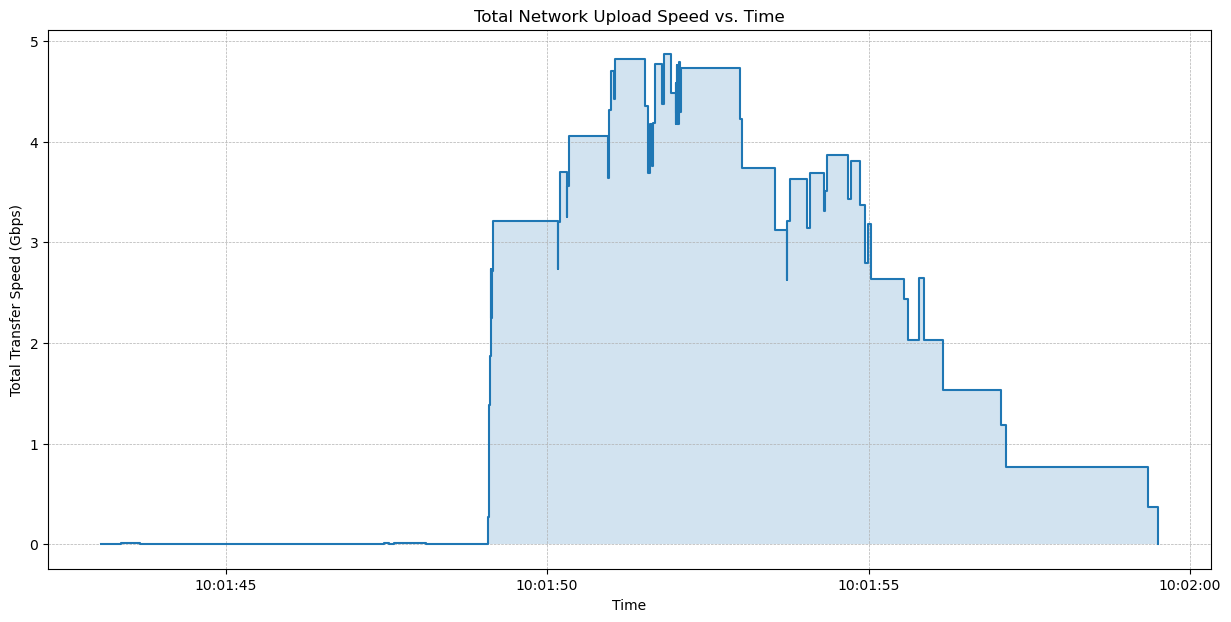

In [74]:
# --- 5. Plot Total Throughput Over Time ---

# Calculate the cumulative sum of rate changes to get the total network speed at any given time.
events_df['total_rate'] = events_df['rate_change'].cumsum()

# Prepare data for a step plot to accurately visualize the changes.
# We need to create pairs of points to draw horizontal lines.
plot_times = []
plot_rates = []
# Start the plot at a rate of 0 just before the first event.
plot_times.append(events_df['time'].iloc[0])
plot_rates.append(0)

for i in range(len(events_df) - 1):
    # Add a point at the beginning of the interval with the new rate
    plot_times.append(events_df['time'].iloc[i])
    plot_rates.append(events_df['total_rate'].iloc[i])
    # Add a point at the end of the interval with the same rate to create the horizontal step
    plot_times.append(events_df['time'].iloc[i+1])
    plot_rates.append(events_df['total_rate'].iloc[i])

# Add the final point
plot_times.append(events_df['time'].iloc[-1])
plot_rates.append(events_df['total_rate'].iloc[-1])


# Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(plot_times, plot_rates)
plt.title('Total Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed (Gbps)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.2)
plt.show()

In [75]:
events_df

,time,rate_change,total_rate
0,2025-09-24 10:01:43.062428,0.000366,3.655830e-04
1,2025-09-24 10:01:43.125948,0.001919,2.284829e-03
2,2025-09-24 10:01:43.200471,0.000337,2.622006e-03
3,2025-09-24 10:01:43.212371,0.000424,3.046188e-03
4,2025-09-24 10:01:43.224892,0.000616,3.662157e-03
...,...,...,...
121,2025-09-24 10:01:56.161767,-0.494714,1.532500e+00
122,2025-09-24 10:01:57.058089,-0.351566,1.180934e+00
123,2025-09-24 10:01:57.135529,-0.417792,7.631424e-01
124,2025-09-24 10:01:59.350801,-0.390095,3.730474e-01


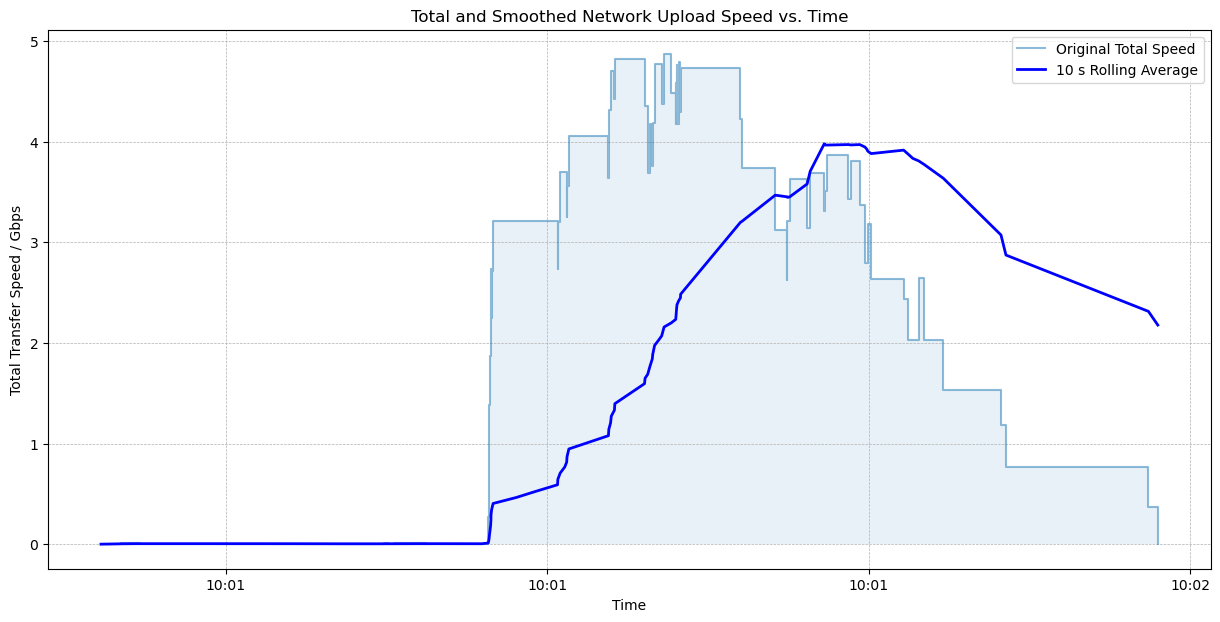

In [76]:
# --- 6. Plot Smoothed Throughput Over Time ---

# Import the necessary formatter from matplotlib
from matplotlib.dates import DateFormatter

# To perform a time-based rolling average, we first set the 'time' column as the index.
events_indexed_by_time = events_df.set_index('time')

# Calculate the rolling mean over a 60-second window.
# This creates a new series with the smoothed transfer rate.
smoothed_rate = events_indexed_by_time['total_rate'].rolling('5s').mean()


# Plotting the original and smoothed data together
plt.figure(figsize=(15, 7))

# Plot the original, "spiky" step plot from the previous cell
plt.plot(plot_times, plot_rates, label='Original Total Speed', alpha=0.5)
plt.fill_between(plot_times, plot_rates, alpha=0.1)

# Plot the new smoothed data
plt.plot(smoothed_rate.index, smoothed_rate.values, label='10 s Rolling Average', color='blue', linewidth=2)

plt.title('Total and Smoothed Network Upload Speed vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Transfer Speed / Gbps')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.xlim(events_df['time'].min()+pd.Timedelta(minutes=20), events_df['time'].max()+pd.Timedelta(minutes=10))
# plt.ylim(0, 40)
plt.legend()

# Get the current axes and set the x-axis formatter
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

plt.show()